In [1]:
import numpy as np
import cv2
import scipy.io as sio
import os
import matplotlib.pyplot as plt

file_list_f = '/mnt/1TB_SSD/dataset/PASCAL3D+_sp/file_list/train_list/car_train.txt'
with open(file_list_f,'r') as fh:
    content = fh.readlines()
    
file_list = [cc.strip().split() for cc in content]
record = []
for ff in file_list:
    if len(ff)==2 and ff[1]=='2':
        print(ff)

['n03770679_1338', '2']
['n03770679_14922', '2']
['n03770679_15288', '2']
['n03770679_1684', '2']
['n03770679_1774', '2']
['n03770679_20779', '2']
['n03770679_2191', '2']
['n03770679_5439', '2']
['n03770679_713', '2']
['n03770679_7325', '2']
['n03770679_8538', '2']
['n03770679_8552', '2']
['n03770679_8637', '2']
['n03770679_9009', '2']
['n03770679_9248', '2']
['n03770679_9862', '2']


In [2]:
file_list.index(['n03770679_7325', '2'])

1166

In [3]:
file = ['n03770679_15288', '2']
# file = file_list[200]
anno_file = '/mnt/1TB_SSD/dataset/PASCAL3D+_sp/car_imagenet/transfered/{}.mat'.format(file[0])
matcontent = sio.loadmat(anno_file)

In [4]:
matcontent.keys()

dict_keys(['__header__', '__version__', '__globals__', 'anno', 'filename'])

In [5]:
matcontent['filename'][0]

'n03770679_15288.JPEG'

In [6]:
print(matcontent['anno'].shape)
print(matcontent['anno'][int(file[1])-1].shape)

(2, 2)
(2,)


In [14]:
print(matcontent['anno'][int(file[1])-1,1].shape)
print(matcontent['anno'][int(file[1])-1,1])

(39, 1)
[[ array([[ 165.19881657,  134.86923077,  265.19881657,  234.86923077,
         344.91066674,  263.92688874,  499.82138102,  418.83760302,    1.        ]])]
 [ array([[ 165.72899408,   87.15325444,  265.72899408,  187.15325444,
         345.73196851,  190.00972897,  500.6426828 ,  344.92044326,    2.        ]])]
 [ array([[ 164.66863905,  169.86094675,  264.66863905,  269.86094675,
         344.08936496,  318.1328059 ,  499.00007925,  473.04352018,    3.        ]])]
 [ array([[ 206.55266272,  126.91656805,  306.55266272,  226.91656805,
         408.9722052 ,  251.60736211,  563.88291948,  406.51807639,    4.        ]])]
 [ array([[ 134.44852071,  132.74852071,  234.44852071,  232.74852071,
         297.27516378,  260.64168164,  452.18587806,  415.55239592,    5.        ]])]
 [ array([[ 140.81065089,  110.48106509,  240.81065089,  210.48106509,
         307.13078508,  226.14700708,  462.04149937,  381.05772137,    6.        ]])]
 [ array([[ 193.82840237,  111.54142012,  293.8284

In [9]:
anno_file = '/mnt/1TB_SSD/dataset/PASCAL3D+_release1.1/Annotations/car_imagenet/{}.mat'.format(file[0])
matcontent2 = sio.loadmat(anno_file)
matcontent2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'record'])

In [34]:
matcontent2['record']['size'][0,0]['width'][0,0][0,0]

640

In [10]:
print(matcontent2['record']['objects'][0,0][0,int(file[1])-1]['bbox'])

[[  88.19509982   54.65607985  579.5199637   401.95190563]]


In [11]:
bbox_value = matcontent2['record']['objects'][0,0][0,int(file[1])-1]['bbox'][0]

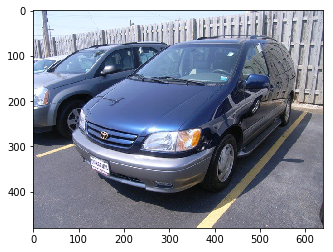

In [12]:
image_f = '/mnt/1TB_SSD/dataset/PASCAL3D+_release1.1/Images/car_imagenet/{}.JPEG'.format(file[0])
img=cv2.imread(image_f)
plt.imshow(img[:,:,::-1])
plt.show()

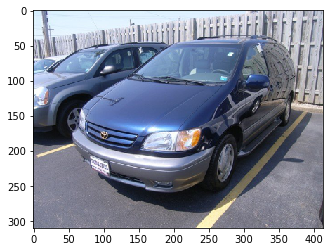

In [13]:
bbox_height = bbox_value[3]-bbox_value[1]
bbox_width = bbox_value[2]-bbox_value[0]
resize_ratio = 224/np.min((bbox_height,bbox_width))
img_resized = cv2.resize(img,None,fx=resize_ratio, fy=resize_ratio)
plt.imshow(img_resized[:,:,::-1])
plt.show()

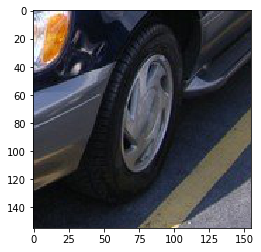

In [21]:
sp_anno0 = matcontent['anno'][int(file[1])-1,1][0,0][0][4:8].astype(int)
sp_patch = img[sp_anno0[1]:sp_anno0[3], sp_anno0[0]:sp_anno0[2]]
plt.imshow(sp_patch[:,:,::-1])
plt.show()

[222 170 322 270]


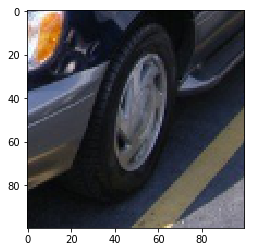

(480, 640, 3)


In [35]:
sp_anno0_resized = (matcontent['anno'][int(file[1])-1,1][0,0][0][4:8]*resize_ratio).astype(int)
print(sp_anno0_resized)
sp_patch_resized = img_resized[sp_anno0_resized[1]:sp_anno0_resized[3], sp_anno0_resized[0]:sp_anno0_resized[2]]
plt.imshow(sp_patch_resized[:,:,::-1])
plt.show()

print(img.shape)

In [ ]:
bbox_new = bbox_value*resize_ratio
img_cropped = 

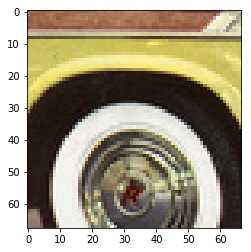

In [57]:
patch=img[92:160, 307:374,:]
plt.imshow(patch[:,:,::-1])
plt.show()

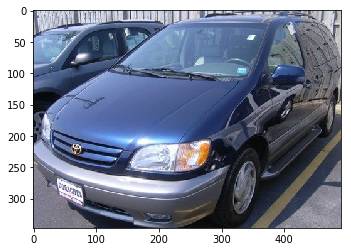

In [10]:
patch=img[54:401, 88:579,:]
plt.imshow(patch[:,:,::-1])
plt.show()

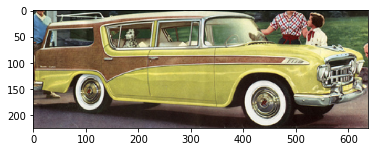

In [63]:
from myresize import *

patch_r = myresize(patch, 224, 'short')
plt.imshow(patch_r[:,:,::-1])
plt.show()

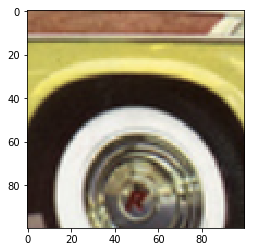

In [64]:
patch_rc=patch_r[89:189, 390:490,:]
plt.imshow(patch_rc[:,:,::-1])
plt.show()


In [19]:
import numpy as np
import cv2
import scipy.io as sio
import os
import matplotlib.pyplot as plt

matfile = '/mnt/1TB_SSD/qing/SP/mat_file/model_65.mat'
matcontent = sio.loadmat(matfile)
matcontent.keys()

dict_keys(['__header__', '__version__', '__globals__', 'prior', 'logZ', 'weight'])

In [20]:
print(matcontent['weight'].shape)
print(matcontent['prior'].shape)
print(matcontent['logZ'].shape)

(40, 176, 7, 7)
(1, 40)
(40, 176, 7, 7)


In [23]:
import h5py
res_info_file = '/mnt/1TB_SSD/qing/SP/mat_file/res_info_test.mat'
f = h5py.File(res_info_file)
res_info = f['res_info']
group = f[res_info[10][0]]
dist = np.array(group['layer_feature_dist'])
feat = np.array(group['layer_feature_ori'])
img = np.array(group['img'])

In [25]:
dist.shape

(176, 27, 14)

In [1]:
import numpy as np
import cv2
import scipy.io as sio
import os
import matplotlib.pyplot as plt

all_categories = ['aeroplane','bicycle', 'bus', 'car', 'motorbike', 'train']
for category in all_categories:
    print(category)
    for set_type in ['train','test']:
        file_list_f = '/mnt/1TB_SSD/dataset/PASCAL3D+_sp/file_list/{0}_list/{1}_{0}.txt'.format(set_type,category)
        with open(file_list_f,'r') as fh:
            content = fh.readlines()

        file_list = [cc.strip().split()[0] for cc in content if cc!='\n']
        print(len(file_list))
        for ff in file_list:
            image_f = '/mnt/1TB_SSD/dataset/PASCAL3D+_release1.1/Images/{}_imagenet/{}.JPEG'.format(category,ff)
            img=cv2.imread(image_f)

            anno_file = '/mnt/1TB_SSD/dataset/PASCAL3D+_release1.1/Annotations/{}_imagenet/{}.mat'.format(category,ff)
            matcontent2 = sio.loadmat(anno_file)
            ww = matcontent2['record']['size'][0,0]['width'][0,0][0,0]
            hh = matcontent2['record']['size'][0,0]['height'][0,0][0,0]

            try:
                assert(ww == img.shape[1])
                assert(hh == img.shape[0])
            except:
                print(category, ff, hh, ww, img.shape)

        print('done')

aeroplane
849
done
824
done
bicycle
373
done
407
done
bus
517
done
498
done
car
2000
done
2000
done
motorbike
315
done
299
done
train
495
done
479
done


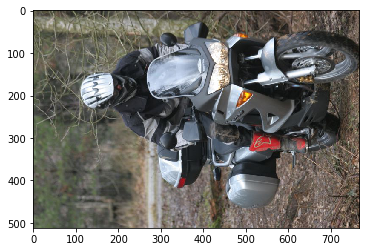

In [21]:
category = 'motorbike'
ff = 'n03790512_7145'
image_f = '/mnt/1TB_SSD/dataset/PASCAL3D+_release1.1/Images/{}_imagenet/{}.JPEG'.format(category,ff)
img=cv2.imread(image_f)
plt.imshow(img[:,:,::-1])
plt.show()

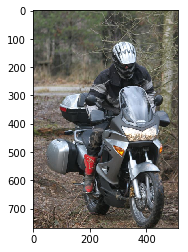

In [25]:
img_fix1 = np.transpose(img, (1,0,2))
img_fix2 = cv2.flip(img_fix1, 1)
plt.imshow(img_fix2[:,:,::-1])
plt.show()

In [2]:
# cv2.imwrite(image_f, img_fix2)

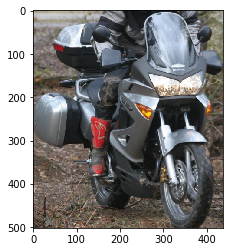

In [26]:
anno_file = '/mnt/1TB_SSD/dataset/PASCAL3D+_release1.1/Annotations/{}_imagenet/{}.mat'.format(category,ff)
matcontent2 = sio.loadmat(anno_file)
bbox_value = matcontent2['record']['objects'][0,0][0,0]['bbox'][0].astype(int)
patch = img_fix2[bbox_value[1]-1:bbox_value[3], bbox_value[0]-1:bbox_value[2]]
plt.imshow(patch[:,:,::-1])
plt.show()

In [17]:
def fix_img(category, ff):
    image_f = '/mnt/1TB_SSD/dataset/PASCAL3D+_release1.1/Images/{}_imagenet/{}.JPEG'.format(category,ff)
    img=cv2.imread(image_f)
    plt.imshow(img[:,:,::-1])
    plt.show()
    img_fix = np.transpose(img, (1,0,2))
    img_fix2 = cv2.flip(img_fix, 0)
    plt.imshow(img_fix2[:,:,::-1])
    plt.show()
    return (image_f,img_fix2)
    # cv2.imwrite(image_f, img_fix2)

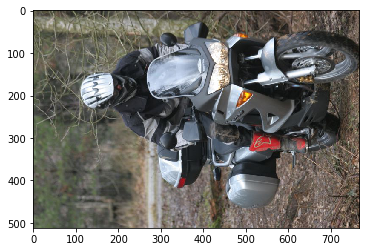

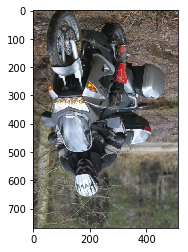

In [20]:
image_f,img_fix2 = fix_img('motorbike','n03790512_7145')

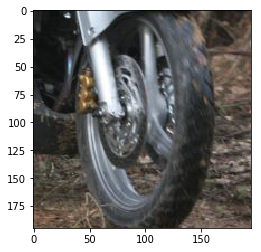

In [29]:
anno_file = '/mnt/1TB_SSD/dataset/PASCAL3D+_sp/{}_imagenet/transfered/{}.mat'.format(category, ff)
matcontent = sio.loadmat(anno_file)
sp_anno0 = matcontent['anno'][0,1][0,0][0][4:8].astype(int)
sp_patch = img_fix2[sp_anno0[1]:sp_anno0[3], sp_anno0[0]:sp_anno0[2]]
plt.imshow(sp_patch[:,:,::-1])
plt.show()

('n02958343_2522', '1')

In [11]:
import h5py
from config import *
category = 'train'
filelist = Dataset['occ_list'].format(category)
with open(filelist, 'r') as fh:
    contents = fh.readlines()

img_list = [cc.strip()[0:-2] for cc in contents if cc != '\n']
idx_list = [cc.strip()[-1] for cc in contents if cc != '\n']
N = len(img_list)
img_dir_occ = Dataset['occ_img_dir'].format(category, 'ONE')
img_dir = Dataset['img_dir_org'].format(category)

for nn in range(N):
    matfile = os.path.join(img_dir_occ, '{}_{}.mat'.format(img_list[nn], idx_list[nn]))
    f = h5py.File(matfile)
    img = np.array(f['record']['img']).T
    hh,ww = img.shape[0:2]
    
    img_file = os.path.join(img_dir, '{}.JPEG'.format(img_list[nn]))
    img2 = cv2.imread(img_file)
    try:
        assert(hh == img2.shape[0])
        assert(ww == img2.shape[1])
    except:
        print(nn, (hh,ww), img2.shape[0:2])
    
print('done')

done


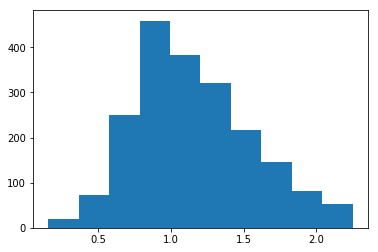

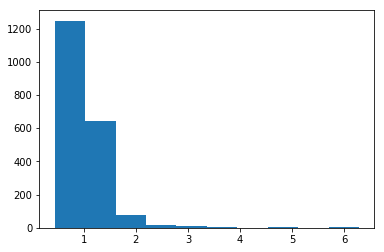

In [24]:
import matplotlib.pyplot as plt

category = 'car'
set_type = 'test'
file_cache_rr = os.path.join(Feat['cache_dir'], 'feat_{}_{}_rr.pickle'.format(category, set_type))
with open(file_cache_rr, 'rb') as fh:
    resize_ratio_ls = pickle.load(fh)
    
plt.hist(resize_ratio_ls)
plt.show()
plt.hist(1/resize_ratio_ls)
plt.show()

(375, 500, 3)


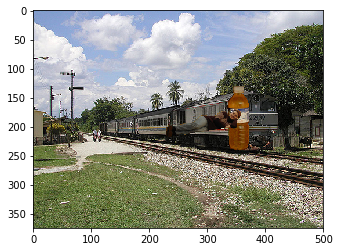

In [16]:
image = np.array(f['record']['img']).T
print(image.shape)
plt.imshow(image)
plt.show()

In [17]:
np.sum(np.ones((3,3)))

9.0

In [41]:
blob = np.arange(27).reshape(3,3,3)
print(blob[:,:,0])
print(blob[:,:,1])
print(blob[:,:,2])

[[ 0  3  6]
 [ 9 12 15]
 [18 21 24]]
[[ 1  4  7]
 [10 13 16]
 [19 22 25]]
[[ 2  5  8]
 [11 14 17]
 [20 23 26]]


In [47]:
msk = np.zeros_like(blob)
for i in range(0, 3, 2):
    for j in range(0,3,2):
        msk[i,j] = 1
        
print(msk[:,:,2])

[[1 0 1]
 [0 0 0]
 [1 0 1]]


In [53]:
msk = msk.astype(bool)

new_rnum = np.sum(msk[:,0,0])
new_cnum = np.sum(msk[0,:,0])
blob2 = (blob.ravel()[msk.ravel()]).reshape(new_rnum, new_cnum, -1)
print(blob2[:,:,0])
print(blob2[:,:,1])
print(blob2[:,:,2])


[[ 0  6]
 [18 24]]
[[ 1  7]
 [19 25]]
[[ 2  8]
 [20 26]]


In [54]:
score = np.zeros_like(blob)
score = score.ravel()
score[msk.ravel()] = blob2.ravel()
score = score.reshape(3,3,3)
print(score[:,:,0])
print(score[:,:,1])
print(score[:,:,2])

[[ 0  0  6]
 [ 0  0  0]
 [18  0 24]]
[[ 1  0  7]
 [ 0  0  0]
 [19  0 25]]
[[ 2  0  8]
 [ 0  0  0]
 [20  0 26]]
